In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import os
import sys
from collections import Counter
from scipy import stats

DATA_BASE = '/home/xander/Dropbox/Affinity/test3/table'

forms = lambda x:os.path.join(DATA_BASE,x)

In [30]:
def multi_bar(xs,ys,title,xlabel,ylabel,filename,save=False,width=0.8,legend=None, alpha=0.5, cm = plt.get_cmap('Vega20'), cm_indice=None):
    """
    draw multiple bar in one plot
    """
    fig, ax = plt.subplots()
    for i in range(len(xs)):
        if legend:
            ax.bar(xs[i],ys[i],width=width, alpha=alpha, label = legend[i],color=cm([cm_indice[i]]))
        else:
            ax.bar(xs[i],ys[i],width=width, alpha=alpha,color=cm([cm_indice[i]]))
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if not legend==None:
        
        ax.legend(bbox_to_anchor=(1.05,1),loc=2, borderaxespad=0.)
    if save:
        fig.savefig(filename, bbox_inches='tight')
        print filename, " saved."

In [31]:

def multi_plot(xs,ys,title,xlabel,ylabel,filename,save=False,width=0.8,legend=None, alpha=0.5, cm = plt.get_cmap('Vega20'), cm_indice=None):
    """
    draw multiple curve in one plot
    """
    fig, ax = plt.subplots()
    for i in range(len(xs)):
        order  = np.flipud(np.argsort(xs[i]))
        x = xs[i][order]
        y = ys[i][order]
        if legend:
            ax.plot(x,y, label = legend[i],color=cm(cm_indice[i]))
        else:
             ax.plot(x,y,color=cm(cm_indice[i]))
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    if not legend==None:
        # move legend out of the plot
        ax.legend(bbox_to_anchor=(1.05,1),loc=2, borderaxespad=0.)
        
    if save:
        # save image
        fig.savefig(filename, bbox_inches='tight')
        print filename, " saved."
        


In [115]:
def multi_errbar(xs,ys, yerrs,title,xlabel,ylabel,filename,save=False,width=0.8,legend=None, alpha=0.5, cm = plt.get_cmap('Vega20'), cm_indice=None):
    """
    draw multiple bar in one plot
    """
    fig, ax = plt.subplots()
    for i in range(len(xs)):
        if legend:
            ax.errorbar(xs[i],ys[i],yerr=yerrs[i], alpha=alpha, label = legend[i])
        else:
            ax.errorbar(xs[i],ys[i],yerr=yerrs[i], alpha=alpha)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if not legend==None:
        
        ax.legend(bbox_to_anchor=(1.05,1),loc=2, borderaxespad=0.)
    if save:
        fig.savefig(filename, bbox_inches='tight')
        print filename, " saved."

In [170]:
def receptor_info():
    df = pd.read_csv(forms('receptor_info.csv'))
    
    val = df['resolution']
    val = (val*10.).apply(int)/10.
    val_c = Counter(val)
    fc = np.asarray(val_c.items())
    
    x = fc[:,0]
    y = fc[:,1]
    
    multi_bar(xs = [x],
              ys=[y],
              title="pdb resolution",
              xlabel="resolution",
              ylabel="frequence",
              filename='None',
              width=0.05,
              legend=None,
              save=False,
              cm_indice=[0])
    
    val = df['heavy_atom_num']
    val = (val/1000.).apply(int) * 1000.
    val_c = Counter(val)
    fc = np.asarray(val_c.items())
    
    
    x = fc[:,0]
    y = fc[:,1]
    
    multi_bar(xs = [x],
              ys=[y],
              title="receptors' heavy atom num",
              xlabel="atom num",
              ylabel="frequence",
              filename='None',
              width=800,
              legend=None,
              save=False,
              cm_indice=[0])
    
    val = df['residue_num']
    #val = (val/1000.).apply(int) * 1000.
    val_c = Counter(val)
    fc = np.asarray(val_c.items())
    
    
    x = fc[:,0]
    y = fc[:,1]
    
    multi_bar(xs = [x],
              ys=[y],
              title="receptors' residue num",
              xlabel="atom num",
              ylabel="frequence",
              filename='None',
              width=0.8,
              legend=None,
              save=False,
              cm_indice=[0])
    
    val = df['chain_num']
    #val = (val).apply(int)
    val_c = Counter(val)
    fc = np.asarray(val_c.items())
    
    
    x = fc[:,0]
    y = fc[:,1]
    
    multi_bar(xs = [x],
              ys=[y],
              title="receptors' chain num",
              xlabel="atom num",
              ylabel="frequence",
              filename='None',
              width=0.2,
              legend=None,
              save=False,
              cm_indice=[0])
    
    

#receptor_info()

In [171]:
def ligand_atom_num():
    df = pd.read_csv(forms('ligand_atom_num.csv'))
    
    val = df['heavy_atom_num']
    #val = (val*100.).apply(int)/100.
    val_c = Counter(val)
    fc = np.asarray(val_c.items())
    
    x = fc[:,0]
    y = fc[:,1]
    
    multi_bar(xs = [x],
              ys=[y],
              title="ligands' heavy atom num",
              xlabel="atom num",
              ylabel="frequence",
              filename='None',
              width=0.8,
              legend=None,
              save=False,
              cm_indice=[0])
    
    df['ligand_name'] = df['name'].apply(lambda x:x.split('_')[1])
    res = df[['ligand_name','heavy_atom_num']]
    res = res.drop_duplicates()
    
    val = res['heavy_atom_num']
    val_c = Counter(val)
    fc = np.asarray(val_c.items())
    
    x = fc[:,0]
    y = fc[:,1]
    
    multi_bar(xs = [x],
              ys=[y],
              title="unique ligands' heavy atom num",
              xlabel="atom num",
              ylabel="frequence",
              filename='None',
              width=0.8,
              legend=None,
              save=False,
              cm_indice=[0])

#ligand_atom_num()

In [110]:
def rotable_bond():
    df = pd.read_csv(forms('rotable_bond.csv'))
    
    val = df['rotable_bond']
    #val = (val*100.).apply(int)/100.
    val_c = Counter(val)
    fc = np.asarray(val_c.items())
    
    if not len(fc):
        print "empty forms"
        return 
    
    x = fc[:,0]
    y = fc[:,1]
    
    multi_bar(xs = [x],
              ys=[y],
              title="ligands' rotable bond num",
              xlabel="rotable bond num",
              ylabel="frequence",
              filename='None',
              width=0.8,
              legend=None,
              save=False,
              cm_indice=[0])
    
    df['ligand_name'] = df['name'].apply(lambda x:x.split('_')[1])
    res = df[['ligand_name','rotable_bond']]
    res = res.drop_duplicates()
    
    val = res['rotable_bond']
    val_c = Counter(val)
    fc = np.asarray(val_c.items())
    
    
    
    x = fc[:,0]
    y = fc[:,1]
    
    multi_bar(xs = [x],
              ys=[y],
              title="unique ligands' rotable bond num",
              xlabel="atom num",
              ylabel="frequence",
              filename='None',
              width=0.8,
              legend=None,
              save=False,
              cm_indice=[0])
    
#rotable_bond()

empty forms


In [172]:
def _rmsd():
    df = pd.read_csv(forms("rmsd.csv"))
    similarity = pd.read_csv(forms("similarity.csv"))
    
    for identifier, group_id in df.groupby('identifier'):
        records = []
        for position, group_pos in group_id.groupby('position'):
            records.append([position, np.mean(group_pos['rmsd']), np.var(group_pos['rmsd'])])
        
        np_records = np.asarray(records)
        x = np_records[:,0]
        y = np_records[:,1]
        yerr = np_records[:,2]
    
        multi_plot(xs = [x],
                     ys = [y],
                     #yerrs = [yerr],
                     title = 'rmsd for %s' % identifier,
                     xlabel='position',
                     ylabel='mean',
                     filename = 'None',
                     width = 0.1,
                     legend = None,
                     save = False,
                     cm_indice=[1])
        
    lig = lambda x:'_'.join(x.split('_')[:3])
    res = df[df['docked_ligand'].apply(lig) == df['crystal_ligand'].apply(lig)]
    
    for identifier, group_id in res.groupby('identifier'):
        records = []
        for position, group_pos in group_id.groupby('position'):
            records.append([position, np.mean(group_pos['rmsd']), np.var(group_pos['rmsd'])])
        
        np_records = np.asarray(records)
        x = np_records[:,0]
        y = np_records[:,1]
        yerr = np_records[:,2]
    
        multi_plot(xs = [x],
                     ys = [y],
                     #yerrs = [yerr],
                     title = 'rmsd for %s with crystal ligands' % identifier,
                     xlabel='position',
                     ylabel='mean',
                     filename = 'None',
                     width = 0.1,
                     legend = None,
                     save = False,
                     cm_indice=[1])
        
    
    lig_ligand = lambda x:'_'.join(x.split('_')[:3]+['ligand'])
    mkpair = lambda x,y: [x,y] if x<y else [y,x]
    similarity
        
#rmsd()

In [173]:
def rmsd(identifier = 'vinardo_dock',finger_print='FP4', similar_threshold=1):
    df = pd.read_csv(forms("rmsd.csv"))
    
    
    df = df[df['identifier'] == identifier]
    records = []
    for position, group_pos in df.groupby('position'):
        records.append([position, np.mean(group_pos['rmsd']), np.var(group_pos['rmsd'])])

    np_records = np.asarray(records)
    x = np_records[:,0]
    y = np_records[:,1]
    yerr = np_records[:,2]

    multi_plot(xs = [x],
                 ys = [y],
                 #yerrs = [yerr],
                 title = 'rmsd for %s' % identifier,
                 xlabel='position',
                 ylabel='mean',
                 filename = 'None',
                 width = 0.1,
                 legend = None,
                 save = False,
                 cm_indice=[1])
        
    lig = lambda x:'_'.join(x.split('_')[:3])
    res = df[df['docked_ligand'].apply(lig) == df['crystal_ligand'].apply(lig)]
    
    records = []
    for position, group_pos in res.groupby('position'):
        records.append([position, np.mean(group_pos['rmsd']), np.var(group_pos['rmsd'])])

    np_records = np.asarray(records)
    x = np_records[:,0]
    y = np_records[:,1]
    yerr = np_records[:,2]

    multi_plot(xs = [x],
                 ys = [y],
                 #yerrs = [yerr],
                 title = 'rmsd for %s with crystal ligands' % identifier,
                 xlabel='position',
                 ylabel='mean',
                 filename = 'None',
                 width = 0.1,
                 legend = None,
                 save = False,
                 cm_indice=[1])
 
    
#rmsd()

In [174]:
def overlap(identifier='vinardo_dock',finger_print='FP4',similar_threshold=1):
    df = pd.read_csv(forms("overlap.csv"))
    
    
    df = df[df['identifier'] == identifier]
    records = []
    for position, group_pos in df.groupby('position'):
        records.append([position, np.mean(group_pos['overlap_ratio']), np.var(group_pos['overlap_ratio'])])

    np_records = np.asarray(records)
    x = np_records[:,0]
    y = np_records[:,1]
    yerr = np_records[:,2]

    multi_plot(xs = [x],
                 ys = [y],
                 #yerrs = [yerr],
                 title = 'overlap for %s' % identifier,
                 xlabel='position',
                 ylabel='mean',
                 filename = 'None',
                 width = 0.1,
                 legend = None,
                 save = False,
                 cm_indice=[1])
    
    lig = lambda x:'_'.join(x.split('_')[:3])
    res = df[df['docked_ligand'].apply(lig) == df['crystal_ligand'].apply(lig)]
    

    if len(res):
        records = []
        for position, group_pos in res.groupby('position'):
            records.append([position, np.mean(group_pos['overlap_ratio']), np.var(group_pos['overlap_ratio'])])

        np_records = np.asarray(records)
        x = np_records[:,0]
        y = np_records[:,1]
        yerr = np_records[:,2]

        multi_plot(xs = [x],
                     ys = [y],
                     #yerrs = [yerr],
                     title = 'overlap for %s with crystal ligands' % identifier,
                     xlabel='position',
                     ylabel='mean',
                     filename = 'None',
                     width = 0.1,
                     legend = None,
                     save = False,
                     cm_indice=[1])
        
    
    
    lig_ligand = lambda x:'_'.join(x.split('_')[:3]+['ligand'])
    idx = identifier.split('_')[0]
    lig_idx = lambda x:'_'.join(x.split('_')[:3]+[idx])
    mkpair = lambda x,y: [x,y] if x<y else [y,x]
    
    similarity = pd.read_csv(forms("similarity.csv"))
    similar_fp = similarity[similarity['finger_print']==finger_print]
    similar_pr = similar_fp[similar_fp['similarity']>= similar_threshold]
    lig_pair = similar_pr[['ligand_a','ligand_b']].values
    docked_ligand = map(lig_idx,lig_pair[:,0]) + map(lig_idx, lig_pair[:,1])
    crystal_ligand = list(lig_pair[:,1]) + list(lig_pair[:,0])
    valid_ligand_pair = pd.DataFrame(zip(docked_ligand,crystal_ligand),columns=['docked_ligand','crystal_ligand'])
    
    res = df.merge(valid_ligand_pair)
    
    records = []
    for position, group_pos in res.groupby('position'):
        records.append([position, np.mean(group_pos['overlap_ratio']), np.var(group_pos['overlap_ratio'])])

    np_records = np.asarray(records)
    x = np_records[:,0]
    y = np_records[:,1]
    yerr = np_records[:,2]

    multi_plot(xs = [x],
                 ys = [y],
                 #yerrs = [yerr],
                 title = 'rmsd for %s with similar ligand' % identifier,
                 xlabel='position',
                 ylabel='mean',
                 filename = 'None',
                 width = 0.1,
                 legend = None,
                 save = False,
                 cm_indice=[1])  
    
    
#overlap()

In [176]:
def native_contact(identifier='vinardo_dock'):
    df = pd.read_csv(forms("native_contact.csv"))
    df = df[df['identifier']==identifier]
    
    xs = []
    ys = []
    yerrs = []
    legend = []
    
    for i,ratio in enumerate(['4_0','4_5','5_0','5_5','6_0','6_5','7_0','7_5','8_0']):
        records = []
        for position, group_pos in df.groupby('position'):
            records.append([position, np.mean(group_pos['ratio_'+ratio]), np.var(group_pos['ratio_'+ratio])])

        np_records = np.asarray(records)
        x = np_records[:,0]
        y = np_records[:,1]
        yerr = np_records[:,2]
        
        xs.append(x)
        ys.append(y)
        yerrs.append(yerr)
        legend.append("threshold : %s" % ratio)
        
        
        multi_plot(xs = [x],
                     ys = [y],
                     #yerrs = [yerr],
                     title = 'native contact for %s with threshold %s' % (identifier,ratio),
                     xlabel='position',
                     ylabel='mean',
                     filename = 'None',
                     width = 0.1,
                     legend = None,
                     save = False,
                     cm_indice=[i])
        
        
    multi_plot(xs=xs,
               ys=ys,
               title='native contact for %s' % identifier,
               xlabel='position',
               ylabel='mean',
               filename='None',
               width = 0.1,
               legend=legend,
               save=False,
               cm_indice= range(len(xs)))
    
    
#native_contact()

empty forms


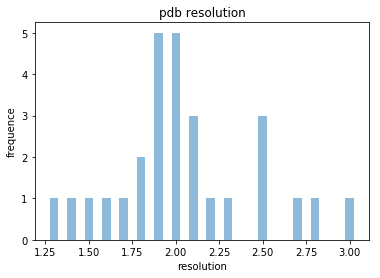

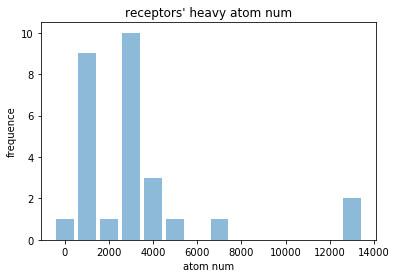

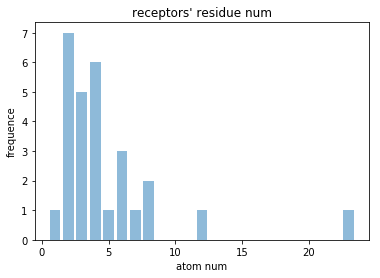

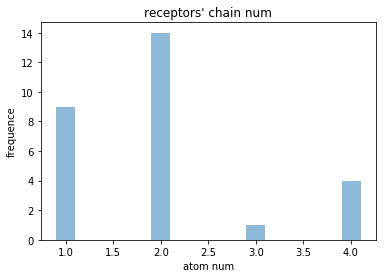

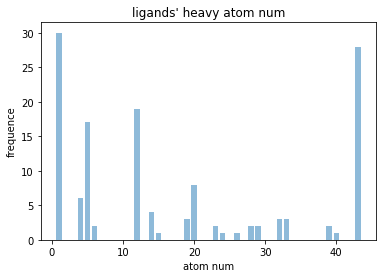

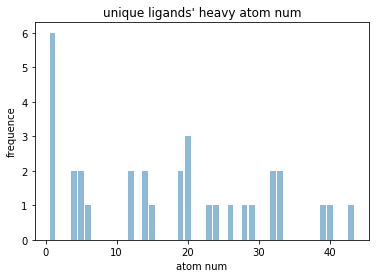

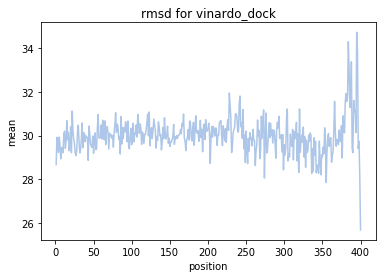

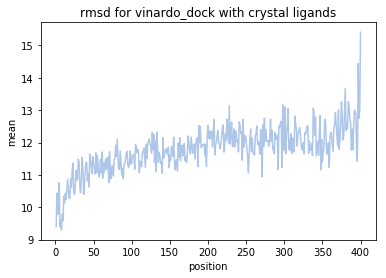

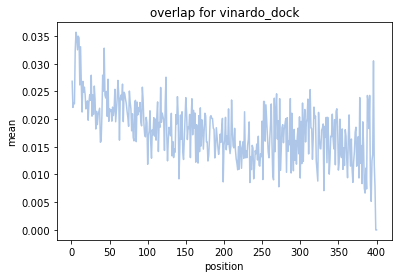

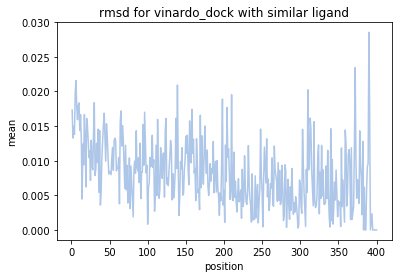

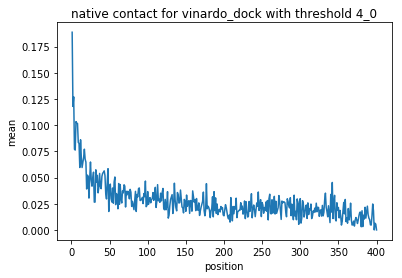

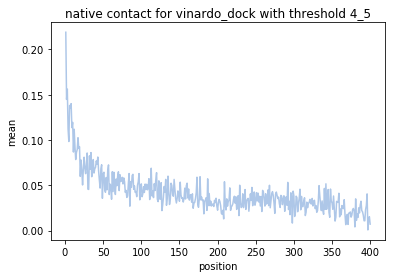

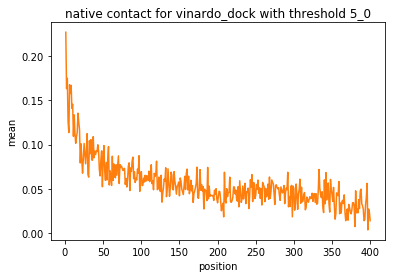

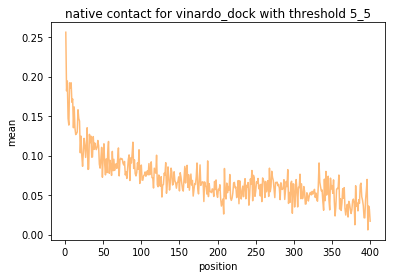

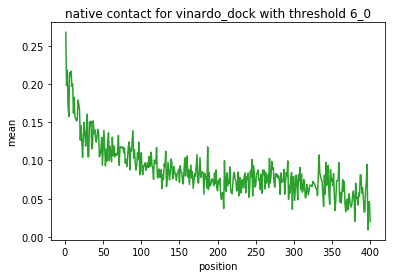

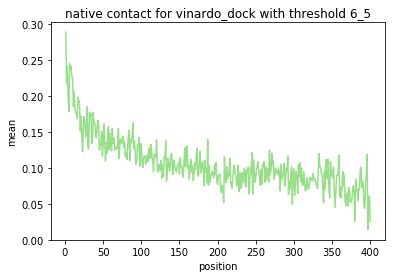

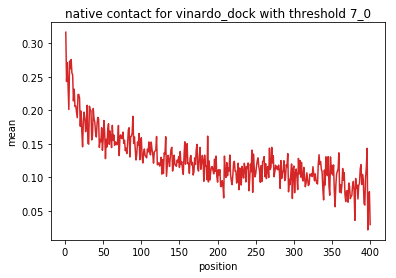

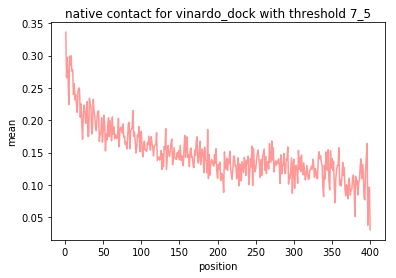

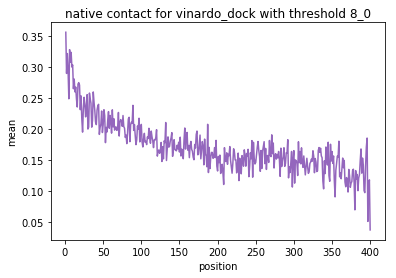

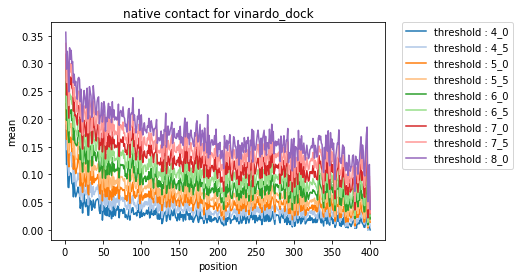

In [175]:
receptor_info()
ligand_atom_num()
rotable_bond()
rmsd()
overlap()
native_contact()

binding_affinity_plot_n.pdf  saved.


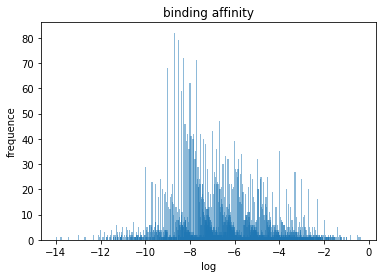

In [184]:
def receptor_info():
    df = pd.read_csv('/home/xander/pdbbind/index/good.csv')
    
    val = df['value']
    val = (val*1e-9).apply(np.log10)
    val_c = Counter(val)
    fc = np.asarray(val_c.items())
    
    x = fc[:,0]
    y = fc[:,1]
    
    multi_bar(xs = [x],
              ys=[y],
              title="binding affinity",
              xlabel="log",
              ylabel="frequence",
              filename='binding_affinity_plot_n.pdf',
              width=0.05,
              legend=None,
              save=True,
              cm_indice=[0])
    
receptor_info()